In [6]:
import pandas as pd
import numpy as np

# Cargar los datos de los archivos proporcionados
cash_requests_path = '../../project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv'
fees_path = '../../project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv'
lexique_path = '../../project-1-ironhack-payments-es/project_dataset/Lexique - Data Analyst.xlsx'

cash_requests_data = pd.read_csv(cash_requests_path)  # Cargar los datos de solicitudes de efectivo
fees_data = pd.read_csv(fees_path)                    # Cargar los datos de las comisiones
lexique_data = pd.read_excel(lexique_path)  

lexique_data.head(13)

,Column name,Description
0,id,Unique ID of the fee object
1,type,Type of fee\nPossible values are :\n\n- instan...
2,status,Status of the fees (= does the fees was succes...
3,category,Describe the reason of the incident fee.\n\n2 ...
4,reason,Description of the fee
5,created_at,Timestamp of the fee's creation
6,updated_at,Timestamp of the latest fee's details update
7,paid_at,Timestamp of the fee's payment
8,from_date,Apply only to postpone fees. Initial date of r...
9,to_date,Apply only to postpone fees. New date of reimb...


In [7]:
# Crear una copia del DataFrame original para mantener los datos originales intactos
modified_cash_requests_data = cash_requests_data.copy()

# Llenar Cash_request_received_date cuando el status es 'transaction_declined'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'transaction_declined', 'cash_request_received_date'] = 'transaction_declined'

# Llenar Money_back_date cuando el status es 'rejected'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'rejected', 'money_back_date'] = 'rejected'

# Llenar user_id con el valor de deleted_account_id donde user_id es nulo
modified_cash_requests_data['user_id'].fillna(modified_cash_requests_data['deleted_account_id'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado para confirmar los cambios
print(modified_cash_requests_data.head())

     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2             

In [8]:
# Definir las columnas a comparar
columns_to_compare = ['cash_request_received_date', 'money_back_date', 'user_id']

# Contar valores nulos antes de las modificaciones
null_counts_before = cash_requests_data[columns_to_compare].isnull().sum()

# Contar valores nulos después de las modificaciones
null_counts_after = modified_cash_requests_data[columns_to_compare].isnull().sum()

# Crear un DataFrame para mostrar la comparación
comparison_df = pd.DataFrame({
    'Before Modifications': null_counts_before,
    'After Modifications': null_counts_after,
    'Difference': null_counts_before - null_counts_after
})

print(comparison_df)

                            Before Modifications  After Modifications  \
cash_request_received_date                  7681                 7633   
money_back_date                             7427                  859   
user_id                                     2103                    0   

                            Difference  
cash_request_received_date          48  
money_back_date                   6568  
user_id                           2103  


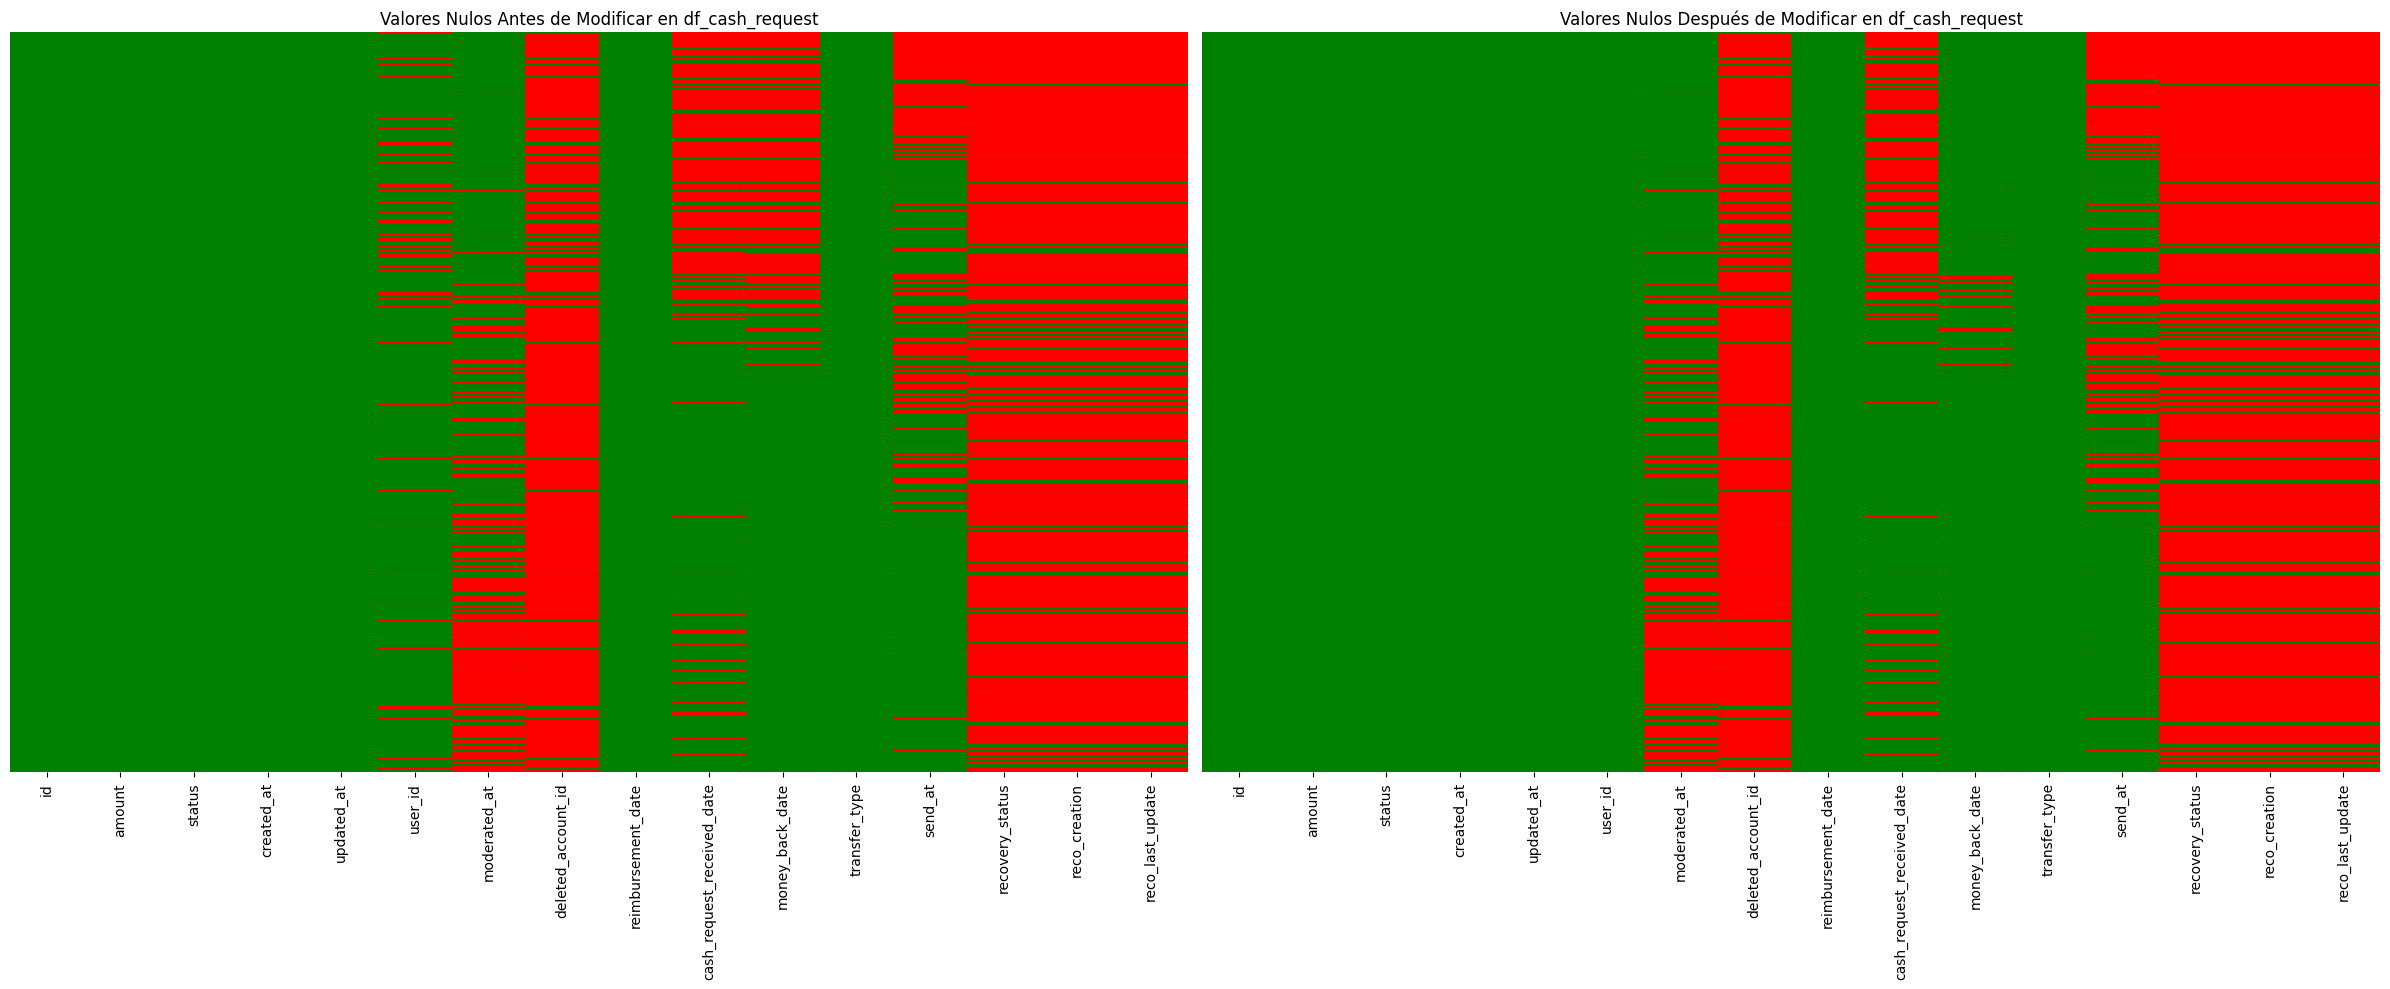

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Asegurarnos de que estamos utilizando el DataFrame correcto y visualizando de manera apropiada
# Utilizando el DataFrame 'modified_cash_requests_data' para la visualización de nulos modificados
cash_requests_null_modified = modified_cash_requests_data.isnull()

# Definir un mapa de colores personalizado
colors = ["green", "red"]  # Verde para valores no nulos, rojo para nulos
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)

# Configuración de la visualización
plt.figure(figsize=(24, 10))  # Ajusta el tamaño según tus necesidades

# Gráfico de calor para el DataFrame de solicitudes de efectivo original
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.heatmap(cash_requests_null_original, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Antes de Modificar en df_cash_request')

# Gráfico de calor para el DataFrame de solicitudes de efectivo modificado
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.heatmap(cash_requests_null_modified, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Después de Modificar en df_cash_request')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [2]:
# Crear una copia del DataFrame original para mantener los datos originales intactos
modified_cash_requests_data = cash_requests_data.copy()

# Llenar Cash_request_received_date cuando el status es 'transaction_declined'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'transaction_declined', 'cash_request_received_date'] = 'transaction_declined'

# Llenar Money_back_date cuando el status es 'rejected'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'rejected', 'money_back_date'] = 'rejected'

# Llenar moderated_at cuando el status es 'rejected'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'rejected', 'moderated_at'] = 'rejected'

# Llenar moderated_at cuando el status es 'canceled', asumiendo que también podría no aplicar
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'canceled', 'moderated_at'] = 'canceled'

# Llenar user_id con el valor de deleted_account_id donde user_id es nulo
modified_cash_requests_data['user_id'].fillna(modified_cash_requests_data['deleted_account_id'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado para confirmar los cambios
print(modified_cash_requests_data.head())


     id  amount    status                     created_at  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                      updated_at  user_id moderated_at  deleted_account_id  \
0   2019-12-11 16:47:42.40783+00    804.0     rejected                 NaN   
1  2019-12-11 14:24:22.900054+00    231.0     rejected                 NaN   
2  2019-12-11 09:46:59.779773+00    191.0     rejected                 NaN   
3  2019-12-18 14:26:18.136163+00    761.0     rejected                 NaN   
4   2020-05-07 09:21:55.34008+00   7686.0     rejected                 NaN   

              reimbursement_date cash_request_received_date money_back_date  \
0  2020-01-09 19:05:21.596363+00                        NaN        rejected   
1   2020-01-

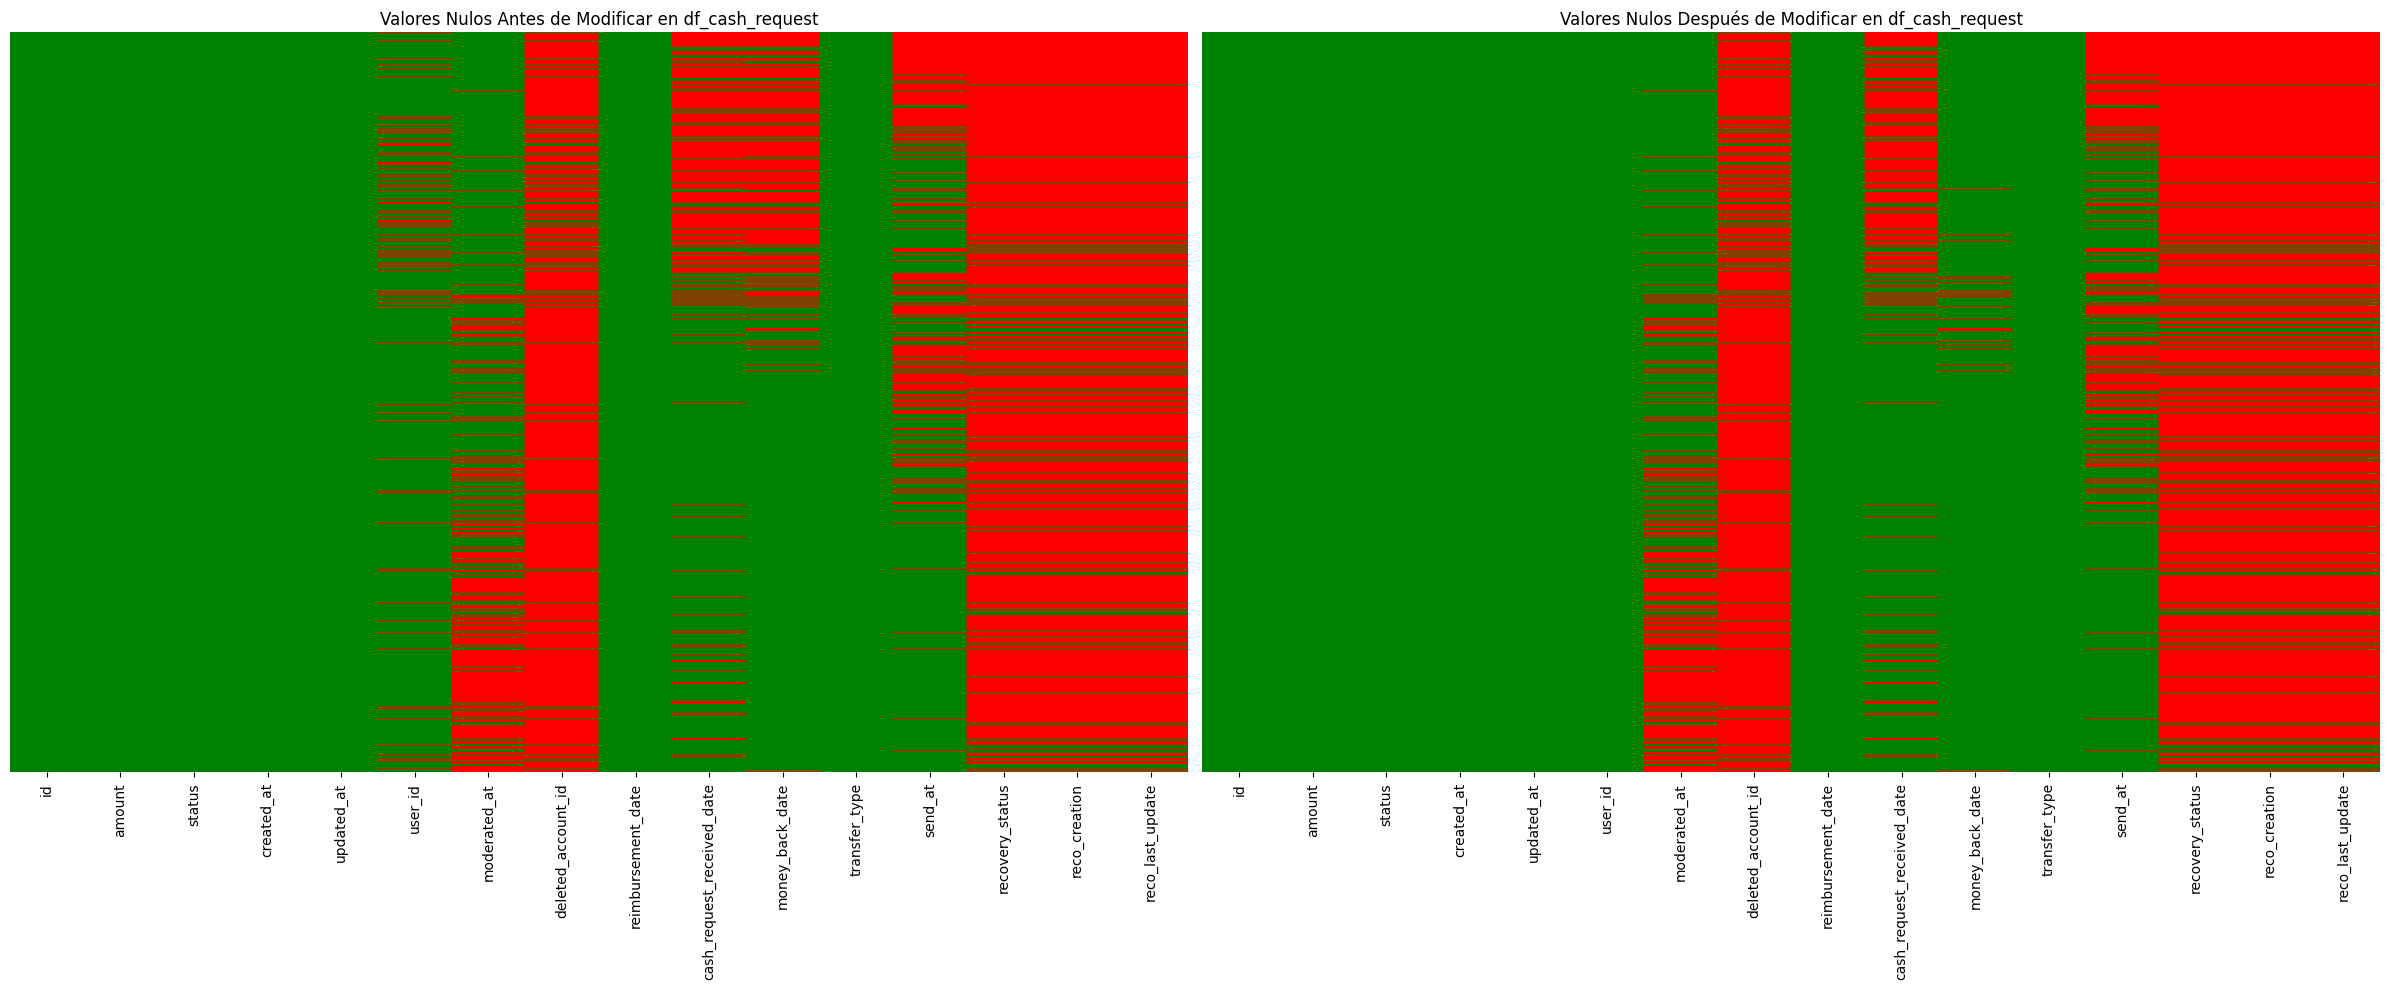

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos de los archivos proporcionados
cash_requests_path = '../../project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv'
fees_path = '../../project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv'
lexique_path = '../../project-1-ironhack-payments-es/project_dataset/Lexique - Data Analyst.xlsx'

cash_requests_data = pd.read_csv(cash_requests_path)  # Cargar los datos de solicitudes de efectivo
fees_data = pd.read_csv(fees_path)                    # Cargar los datos de las comisiones
lexique_data = pd.read_excel(lexique_path)  

# Crear una copia del DataFrame original para mantener los datos originales intactos
modified_cash_requests_data = cash_requests_data.copy()

# Definir cash_requests_null_original para visualizar los nulos antes de modificar
cash_requests_null_original = cash_requests_data.isnull()

# Llenar campos específicos en el DataFrame modificado según el estado
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'transaction_declined', 'cash_request_received_date'] = 'transaction_declined'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'rejected', ['money_back_date', 'moderated_at']] = 'rejected'
modified_cash_requests_data.loc[modified_cash_requests_data['status'] == 'canceled', 'moderated_at'] = 'canceled'
modified_cash_requests_data['user_id'].fillna(modified_cash_requests_data['deleted_account_id'], inplace=True)

# Definir un mapa de colores personalizado para la visualización de nulos
colors = ["green", "red"]  # Verde para valores no nulos, rojo para nulos
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)

plt.figure(figsize=(24, 10))  # Ajusta el tamaño según tus necesidades

# Gráfico de calor para el DataFrame de solicitudes de efectivo original
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.heatmap(cash_requests_null_original, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Antes de Modificar en df_cash_request')

# Gráfico de calor para el DataFrame de solicitudes de efectivo modificado
cash_requests_null_modified = modified_cash_requests_data.isnull()
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.heatmap(cash_requests_null_modified, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Después de Modificar en df_cash_request')

plt.tight_layout()
plt.show()


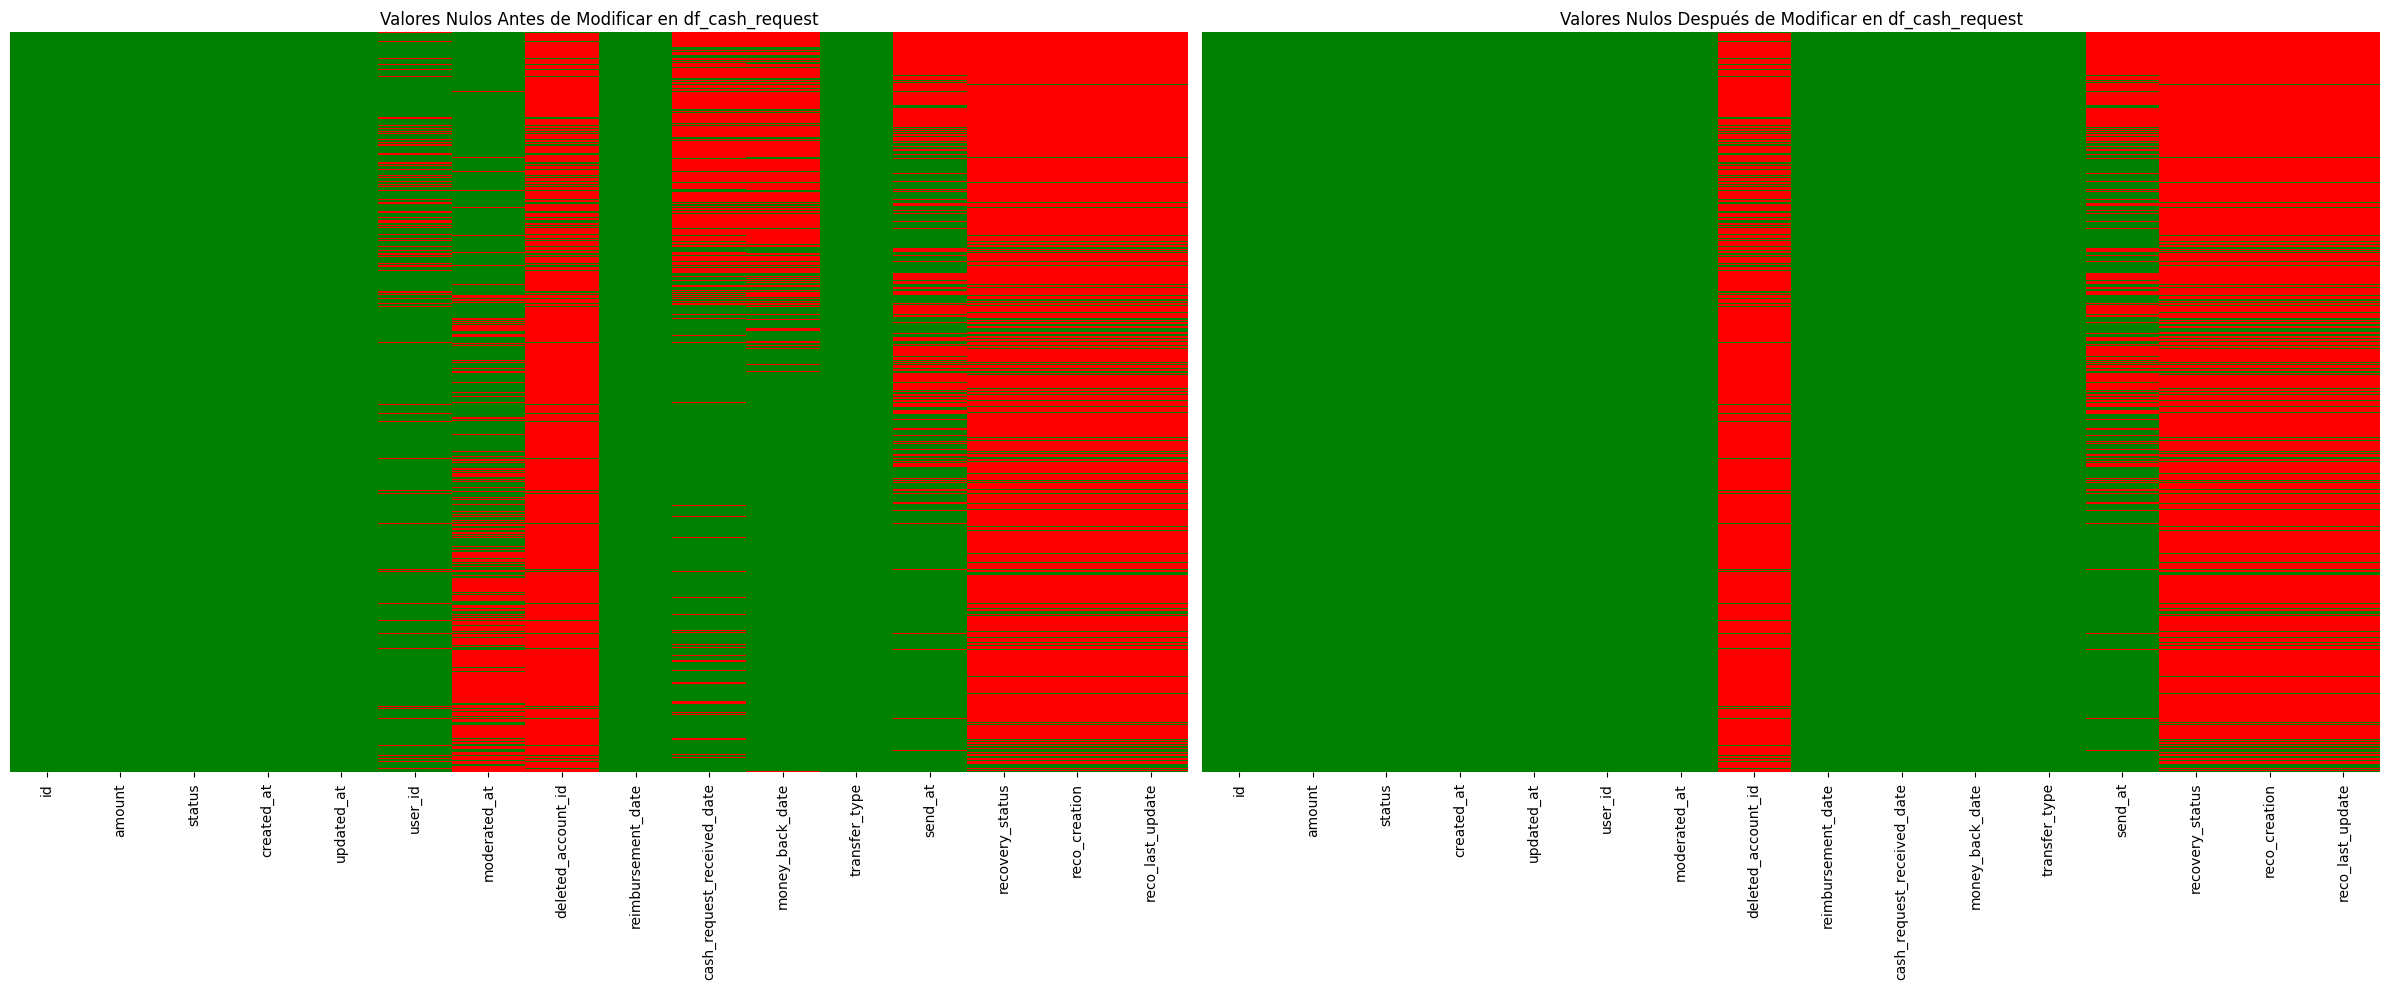

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Cargar los datos de los archivos proporcionados
cash_requests_path = '../../project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv'
fees_path = '../../project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv'
lexique_path = '../../project-1-ironhack-payments-es/project_dataset/Lexique - Data Analyst.xlsx'

cash_requests_data = pd.read_csv(cash_requests_path)  # Cargar los datos de solicitudes de efectivo
fees_data = pd.read_csv(fees_path)                    # Cargar los datos de las comisiones
lexique_data = pd.read_excel(lexique_path)  

# Crear una copia del DataFrame original para mantener los datos originales intactos
modified_cash_requests_data = cash_requests_data.copy()

# Combinando status y transfer_type para usarlo como valor de relleno
modified_cash_requests_data['fill_value'] = modified_cash_requests_data['status'] + "_" + modified_cash_requests_data['transfer_type']

# Llenar campos específicos en el DataFrame modificado según el estado y el tipo de transferencia
modified_cash_requests_data.loc[modified_cash_requests_data['cash_request_received_date'].isnull(), 'cash_request_received_date'] = modified_cash_requests_data['fill_value']
modified_cash_requests_data.loc[modified_cash_requests_data['money_back_date'].isnull(), 'money_back_date'] = modified_cash_requests_data['fill_value']
modified_cash_requests_data.loc[modified_cash_requests_data['moderated_at'].isnull(), 'moderated_at'] = modified_cash_requests_data['fill_value']

# Llenar user_id con el valor de deleted_account_id donde user_id es nulo
modified_cash_requests_data['user_id'].fillna(modified_cash_requests_data['deleted_account_id'], inplace=True)

# Eliminando la columna temporal 'fill_value'
del modified_cash_requests_data['fill_value']

# Definir un mapa de colores personalizado para la visualización de nulos
colors = ["green", "red"]  # Verde para valores no nulos, rojo para nulos
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)

plt.figure(figsize=(24, 10))  # Ajusta el tamaño según tus necesidades

# Gráfico de calor para el DataFrame de solicitudes de efectivo original
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.heatmap(cash_requests_data.isnull(), cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Antes de Modificar en df_cash_request')

# Gráfico de calor para el DataFrame de solicitudes de efectivo modificado
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.heatmap(modified_cash_requests_data.isnull(), cbar=False, yticklabels=False, cmap=cmap)
plt.title('Valores Nulos Después de Modificar en df_cash_request')

plt.tight_layout()
plt.show()
